In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import skl2onnx
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

In [75]:
print(skl2onnx.__max_supported_opset__)

18


# 读取数据

In [76]:
# header=None 不将第一行设为列名
wine = pd.read_csv("../datasets/wine.data", header=None)
wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


- Class label：分类标签
- Alcohol：酒精
- Malic acid：苹果酸
- Ash：灰
- Alcalinity of ash：灰的碱度
- Magnesium：镁
- Total phenols：总酚
- Flavanoids：黄酮类化合物
- Nonflavanoid phenols：非黄烷类酚类
- Proanthocyanins：原花青素
- Color intensity：色彩强度
- Hue：色调
- OD280/OD315 of diluted wines：稀释酒OD280 OD350
- Proline：脯氨酸

In [77]:
columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash','Magnesium',
           'Total phenols','Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
           'Color intensity', 'Hue','OD280/OD315 of diluted wines','Proline']
wine.columns = columns
wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [78]:
wine.dtypes

Class label                       int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

In [79]:
wine.describe()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<Axes: >

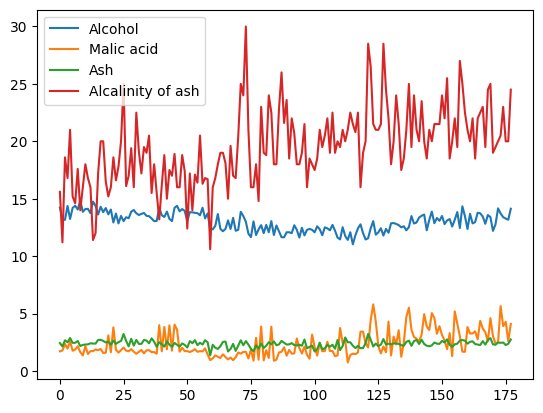

In [80]:
wine[columns[1:5]].plot()

# 数据预处理

In [81]:
np.any(wine.isna())

False

In [82]:
x = wine[columns[1:]]
x

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [83]:
y = wine[columns[0]]
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Class label, Length: 178, dtype: int64

## 标签转换 [1, 2, 3] -> [0, 1, 2]

In [84]:
from sklearn.preprocessing import LabelEncoder

In [85]:
le = LabelEncoder()

In [86]:
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

# 划分数据

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)

In [89]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((89, 13), (89, 13), (89,), (89,))

# SVC

In [90]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, log_loss

In [91]:
svc = SVC(probability=True)
svc

SVC(probability=True)

In [92]:
svc.fit(x_train, y_train)

SVC(probability=True)

In [93]:
svc.score(x_test, y_test)

0.6741573033707865

In [94]:
y_pred1 = svc.predict(x_test)
y_pred1

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1], dtype=int64)

In [95]:
accuracy_score(y_test, y_pred1)

0.6741573033707865

In [96]:
y_pred_proba1 = svc.predict_proba(x_test)
y_pred_proba1[:10]

array([[0.92777027, 0.04177232, 0.03045741],
       [0.01149003, 0.52317848, 0.46533149],
       [0.00749364, 0.49554761, 0.49695875],
       [0.95700205, 0.02492231, 0.01807564],
       [0.00605392, 0.47831802, 0.51562805],
       [0.01030012, 0.51684392, 0.47285596],
       [0.98448919, 0.00847271, 0.00703811],
       [0.01590035, 0.53856855, 0.4455311 ],
       [0.0145169 , 0.53393193, 0.45155117],
       [0.01132593, 0.52138873, 0.46728534]])

In [97]:
log_loss(y_test, y_pred_proba1)

0.7126660793680967

In [101]:
initial_type = [('input', FloatTensorType([1, 13]))]
onx = convert_sklearn(svc, initial_types=initial_type, target_opset=18)
with open("SVC.onnx", "wb") as f:
    f.write(onx.SerializeToString())

# RandomForestClassifier

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
rfc = RandomForestClassifier(n_estimators=100,
                             max_depth=5,
                             criterion="entropy",
                             n_jobs=-1)
rfc

RandomForestClassifier(criterion='entropy', max_depth=5, n_jobs=-1)

In [104]:
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_jobs=-1)

In [105]:
rfc.score(x_test, y_test)

0.9775280898876404

In [106]:
y_pred2 = rfc.predict(x_test)
y_pred2

array([0, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 2, 1, 1, 2, 0, 0, 1, 1,
       1, 0, 2, 1, 2, 0, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 2, 0, 2, 2, 1, 1,
       2, 1, 0, 1, 1, 1, 0, 0, 1, 0, 2, 2, 1, 1, 1, 2, 2, 0, 2, 1, 1, 1,
       1], dtype=int64)

In [107]:
accuracy_score(y_test, y_pred2)

0.9775280898876404

In [108]:
y_pred_proba2 = rfc.predict_proba(x_test)
y_pred_proba2[:10]

array([[1.  , 0.  , 0.  ],
       [0.  , 0.1 , 0.9 ],
       [0.2 , 0.8 , 0.  ],
       [0.99, 0.01, 0.  ],
       [0.26, 0.61, 0.13],
       [0.25, 0.69, 0.06],
       [0.95, 0.04, 0.01],
       [0.01, 0.11, 0.88],
       [0.  , 1.  , 0.  ],
       [0.01, 0.94, 0.05]])

In [109]:
log_loss(y_test, y_pred_proba2)

0.18751446928077317

In [111]:
initial_type = [('input', FloatTensorType([1, 13]))]
onx = convert_sklearn(rfc, initial_types=initial_type, target_opset=18)
with open("RandomForestClassifier.onnx", "wb") as f:
    f.write(onx.SerializeToString())

# XGBClassifier

In [112]:
from xgboost import XGBClassifier

In [113]:
xgbc = XGBClassifier(n_estimators=100,
                     learning_rate=0.1,
                     max_depth=5,
                     max_leaves=10,
                     subsample=1,       # 系统默认为1。这个参数控制对于每棵树，随机采样的比例。减小这个参数的值，算法会更加保守，避免过拟合, 取值范围零到一
                     colsample_bytree=1,# 系统默认值为1。我们一般设置成0.8左右。用来控制每棵随机采样的列数的占比(每一列是一个特征)
                     n_jobs=-1)
xgbc

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=10,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [114]:
xgbc.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=10,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [115]:
xgbc.score(x_test, y_test)

0.9662921348314607

In [116]:
y_pred3 = xgbc.predict(x_test)
y_pred3

array([0, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 2, 1, 1, 2, 0, 0, 1, 1,
       1, 0, 2, 1, 2, 0, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 2, 0, 2, 2, 1, 1,
       2, 1, 0, 1, 1, 1, 0, 0, 1, 0, 2, 2, 1, 1, 1, 2, 2, 0, 2, 1, 1, 1,
       1], dtype=int64)

In [117]:
accuracy_score(y_test, y_pred3)

0.9662921348314607

In [118]:
y_pred_proba3 = xgbc.predict_proba(x_test)
y_pred_proba3[:10]

array([[0.9921961 , 0.00365904, 0.00414485],
       [0.01052205, 0.01132423, 0.9781537 ],
       [0.0228237 , 0.9658382 , 0.01133815],
       [0.99242955, 0.00325527, 0.00431521],
       [0.04921722, 0.82478285, 0.12599997],
       [0.15795338, 0.75155324, 0.0904934 ],
       [0.9913747 , 0.00347092, 0.00515436],
       [0.0047443 , 0.01866218, 0.9765935 ],
       [0.00270286, 0.9946201 , 0.00267707],
       [0.00254535, 0.99332196, 0.00413272]], dtype=float32)

In [119]:
log_loss(y_test, y_pred_proba3)

0.1363272566521429

In [121]:
initial_type = [('input', FloatTensorType([1, 13]))]
onx = convert_sklearn(xgbc, initial_types=initial_type, target_opset=18)
with open("XGBClassifier.onnx", "wb") as f:
    f.write(onx.SerializeToString())

MissingShapeCalculator: Unable to find a shape calculator for type '<class 'xgboost.sklearn.XGBClassifier'>'.
It usually means the pipeline being converted contains a
transformer or a predictor with no corresponding converter
implemented in sklearn-onnx. If the converted is implemented
in another library, you need to register
the converted so that it can be used by sklearn-onnx (function
update_registered_converter). If the model is not yet covered
by sklearn-onnx, you may raise an issue to
https://github.com/onnx/sklearn-onnx/issues
to get the converter implemented or even contribute to the
project. If the model is a custom model, a new converter must
be implemented. Examples can be found in the gallery.


# LGBMClassifier

In [122]:
from lightgbm import LGBMClassifier

In [123]:
lgbmc = LGBMClassifier(
                       boosting_type = 'gbdt',
                       num_leaves = 31,
                       max_depth = -1,
                       learning_rate = 0.1,
                       n_estimators = 100,
                       n_jobs = -1,
                       )
lgbmc

LGBMClassifier()

In [124]:
lgbmc.fit(x_train, y_train)

LGBMClassifier()

In [125]:
lgbmc.score(x_test, y_test)

0.9550561797752809

In [126]:
y_pred4 = lgbmc.predict(x_test)

In [127]:
accuracy_score(y_test, y_pred4)

0.9550561797752809

In [128]:
y_pred_proba4 = lgbmc.predict_proba(x_test)
y_pred_proba4[:10]

array([[9.99983903e-01, 1.44050356e-05, 1.69173320e-06],
       [1.01774995e-05, 6.47406331e-05, 9.99925082e-01],
       [8.19320054e-04, 9.99162705e-01, 1.79751479e-05],
       [9.99975379e-01, 2.08468321e-05, 3.77390912e-06],
       [1.47872969e-02, 9.72535380e-01, 1.26773234e-02],
       [2.27024911e-01, 7.65068311e-01, 7.90677850e-03],
       [9.99994178e-01, 2.56793484e-06, 3.25438970e-06],
       [1.00539431e-06, 1.38527043e-04, 9.99860468e-01],
       [3.06595125e-05, 9.99954215e-01, 1.51259405e-05],
       [2.89965829e-06, 9.99989070e-01, 8.02989712e-06]])

In [129]:
log_loss(y_test, y_pred_proba4)

0.09501537268919868

In [130]:
initial_type = [('input', FloatTensorType([1, 13]))]
onx = convert_sklearn(lgbmc, initial_types=initial_type, target_opset=18)
with open("LGBMClassifier.onnx", "wb") as f:
    f.write(onx.SerializeToString())

MissingShapeCalculator: Unable to find a shape calculator for type '<class 'lightgbm.sklearn.LGBMClassifier'>'.
It usually means the pipeline being converted contains a
transformer or a predictor with no corresponding converter
implemented in sklearn-onnx. If the converted is implemented
in another library, you need to register
the converted so that it can be used by sklearn-onnx (function
update_registered_converter). If the model is not yet covered
by sklearn-onnx, you may raise an issue to
https://github.com/onnx/sklearn-onnx/issues
to get the converter implemented or even contribute to the
project. If the model is a custom model, a new converter must
be implemented. Examples can be found in the gallery.


# CatBoostClassifier

In [131]:
from catboost import CatBoostClassifier

In [132]:
cbc = CatBoostClassifier(learning_rate=0.1,)
cbc

In [133]:
cbc.fit(x_train, y_train)

0:	learn: 1.0234851	total: 1.17ms	remaining: 1.17s
1:	learn: 0.9421271	total: 1.94ms	remaining: 966ms
2:	learn: 0.8696367	total: 2.71ms	remaining: 902ms
3:	learn: 0.8071878	total: 3.41ms	remaining: 850ms
4:	learn: 0.7538260	total: 4.15ms	remaining: 825ms
5:	learn: 0.6974360	total: 4.89ms	remaining: 810ms
6:	learn: 0.6516648	total: 5.63ms	remaining: 798ms
7:	learn: 0.6197986	total: 6.64ms	remaining: 823ms
8:	learn: 0.5863257	total: 7.55ms	remaining: 832ms
9:	learn: 0.5513493	total: 8.37ms	remaining: 829ms
10:	learn: 0.5201981	total: 9.45ms	remaining: 850ms
11:	learn: 0.4964664	total: 10.6ms	remaining: 875ms
12:	learn: 0.4735832	total: 11.4ms	remaining: 863ms
13:	learn: 0.4470868	total: 12.1ms	remaining: 851ms
14:	learn: 0.4220142	total: 12.9ms	remaining: 847ms
15:	learn: 0.4025320	total: 13.9ms	remaining: 852ms
16:	learn: 0.3836927	total: 14.7ms	remaining: 850ms
17:	learn: 0.3669561	total: 15.6ms	remaining: 850ms
18:	learn: 0.3485105	total: 16.5ms	remaining: 850ms
19:	learn: 0.3331025	t

In [134]:
cbc.score(x_test, y_test)

0.9325842696629213

In [135]:
y_pred5 = cbc.predict(x_test)

In [136]:
accuracy_score(y_test, y_pred5)

0.9325842696629213

In [137]:
y_pred_proba5 = lgbmc.predict_proba(x_test)
y_pred_proba5[:10]

array([[9.99983903e-01, 1.44050356e-05, 1.69173320e-06],
       [1.01774995e-05, 6.47406331e-05, 9.99925082e-01],
       [8.19320054e-04, 9.99162705e-01, 1.79751479e-05],
       [9.99975379e-01, 2.08468321e-05, 3.77390912e-06],
       [1.47872969e-02, 9.72535380e-01, 1.26773234e-02],
       [2.27024911e-01, 7.65068311e-01, 7.90677850e-03],
       [9.99994178e-01, 2.56793484e-06, 3.25438970e-06],
       [1.00539431e-06, 1.38527043e-04, 9.99860468e-01],
       [3.06595125e-05, 9.99954215e-01, 1.51259405e-05],
       [2.89965829e-06, 9.99989070e-01, 8.02989712e-06]])

In [138]:
log_loss(y_test, y_pred_proba5)

0.09501537268919868

In [140]:
initial_type = [('input', FloatTensorType([1, 13]))]
onx = convert_sklearn(cbc, initial_types=initial_type, target_opset=18)
with open("CatBoostClassifier.onnx", "wb") as f:
    f.write(onx.SerializeToString())

MissingShapeCalculator: Unable to find a shape calculator for type '<class 'catboost.core.CatBoostClassifier'>'.
It usually means the pipeline being converted contains a
transformer or a predictor with no corresponding converter
implemented in sklearn-onnx. If the converted is implemented
in another library, you need to register
the converted so that it can be used by sklearn-onnx (function
update_registered_converter). If the model is not yet covered
by sklearn-onnx, you may raise an issue to
https://github.com/onnx/sklearn-onnx/issues
to get the converter implemented or even contribute to the
project. If the model is a custom model, a new converter must
be implemented. Examples can be found in the gallery.
